**Multiple Linear Regression**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed) 설정
torch.manual_seed(1)

**Training**

In [ ]:
# 데이터셋 생성 (강의자료 참조하여 구현하시오.)
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 80],
                             [96, 98, 100]])
y_train = torch.FloatTensor([152, 185, 180, 196]).view(-1, 1)

# 모델 초기화 (강의자료 참조하여 구현하시오.)
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정 (강의자료 참조하여 구현하시오.) 
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 1000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    # 가설 및 손실함수 (강의자료 참조하여 구현하시오.)    
    h = x_train.matmul(W) + b
    cost = torch.mean((h - y_train)**2)

    # 경사하강법 (강의자료 참조하여 구현하시오.)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    w_list = W.view(-1).tolist()
    if epoch % 100 == 0:      
        print('Epoch {:4d}/{} w1: {:.3f}, w2: {:.3f}, w3: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w_list[0], w_list[1], w_list[2], b.item(), cost.item()
        ))

**Inference**

In [ ]:
#아직 결과값을 모르는 데이터에 대한 추론 (강의자료 참조하여 구현)
test_data = torch.FloatTensor([73, 66, 70])
pred = test_data.matmul(W) + b
print(pred)

**Multiple Linear Regression Implementation using torch.nn.Module**

In [ ]:
#모델 코드(강의자료 참조하여 구현)
class MLR(nn.Module):
    def __init__(self, n=3) -> None:
        super().__init__()
        self.linear = nn.Linear(n, 1)
    
    def forward(self, x):
        return self.linear(x)

**Training**

In [ ]:
#강의자료 참조하여 필요한 부분들 구현
model = MLR()
print(list(model.parameters()))
optimizer = optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 1000
for epoch in range(nb_epochs+1):    
    pred = model(x_train)
    cost = F.mse_loss(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

**Inference**

In [ ]:
#강의자료 참조하여 구현
pred = model(test_data)
print(pred)

**과제**

아래 그림은 화학실험 관련 데이터로써 두 가지 요소(Factor 1, Factor 2)를 바꾸어가며 최종 결과물 산출량을 측정한 결과이다. 해당 데이터에 대해서 다중 선형회귀를 수행하시오.
(Factor 1, Factor 2 이렇게 총 2개의 독립변수를 사용하고 레이블로는 Yield 컬럼을 활용할 것)

그리고 학습된 모델을 이용하여 Factor 1: 57.0, Factor 2: 31.7일 때의 Yield 값을 예측해보시오.

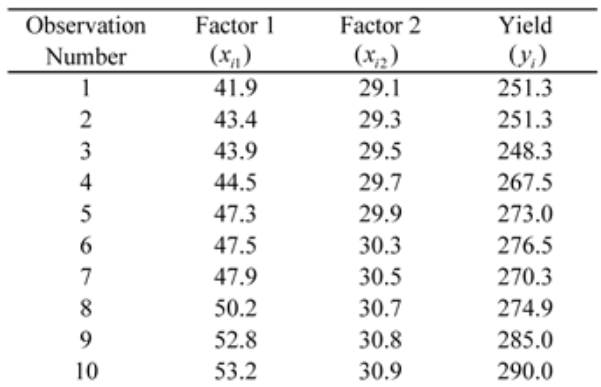

In [ ]:
train_data = torch.FloatTensor([[41.9, 29.1],
                                [43.4, 29.3],
                                [43.9, 29.5],
                                [44.5, 29.7],
                                [47.3, 29.9],
                                [47.5, 30.3],
                                [47.9, 30.5],
                                [50.2, 30.7],
                                [52.8, 30.8],
                                [53.2, 30.9]])
train_label = torch.FloatTensor([251.3, 251.3, 248.3, 267.5, 273.0, 276.5, 270.3, 274.9, 285.0, 290.0]).view(-1, 1)

model2 = MLR(2)
optimizer = optim.SGD(model2.parameters(), lr=1e-5)
nb_epochs = 10000
for epoch in range(nb_epochs+1):    
    pred = model2(train_data)
    cost = F.mse_loss(pred, train_label)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

test_data = torch.FloatTensor([57.0, 31.7])
pred = model2(test_data)
print(pred)